In [15]:
import scipy.io as sio  

import pandas as pd

import numpy as np      

from matplotlib.ticker import FuncFormatter 

import matplotlib.pyplot as plt  

import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)

In [16]:
data = sio.loadmat("INTC_20141105.mat")

In [17]:
LOB=data['LOB']

t = (np.array((LOB['EventTime'][0][0][:,0]))-3600000*9.5)*1e-3
bid = np.array(LOB['BuyPrice'][0][0]*1e-4)
bidvol = np.array(LOB['BuyVolume'][0][0]*1.0)
ask = np.array(LOB['SellPrice'][0][0]*1e-4)
askvol = np.array(LOB['SellVolume'][0][0]*1.0)
MO=np.array(LOB['MO'][0][0]*1.0)
dt = t[1]-t[0]

# Midprice | Microprice | Spread

In [18]:
midprice = 0.5*(bid[:,0]+ask[:,0])
microprice= (bid[:,0]*askvol[:,0]+ask[:,0]*bidvol[:,0])/(bidvol[:,0]+askvol[:,0])
spread = ask[:,0]-bid[:,0]

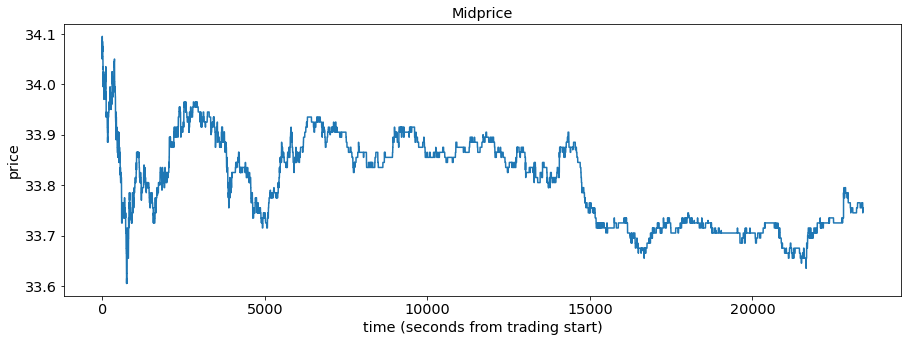

In [19]:
plt.plot(t, midprice)
plt.title('Midprice')
plt.ylabel('price')
plt.xlabel('time (seconds from trading start)')
plt.show()

In [20]:
data = pd.DataFrame(midprice)

In [21]:
data.describe()

,0
count,234000.000000
mean,33.806565
std,0.084903
min,33.605000
25%,33.725000
50%,33.825000
75%,33.875000
max,34.095000


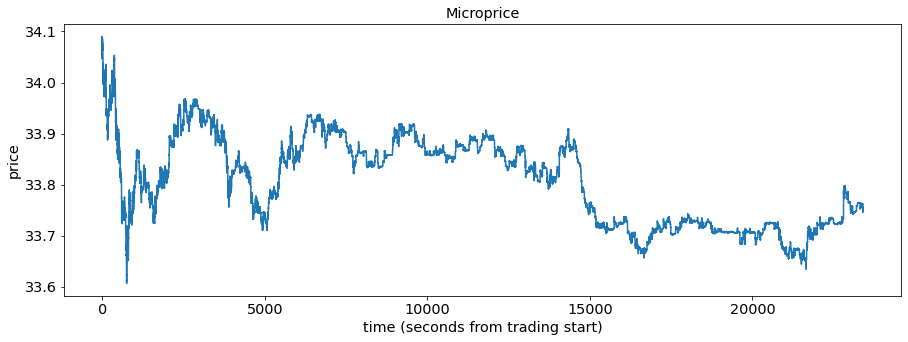

In [22]:
plt.plot(t, microprice)
plt.title('Microprice')
plt.ylabel('price')
plt.xlabel('time (seconds from trading start)')
plt.show()

In [23]:
data = pd.DataFrame(microprice)

In [24]:
data.describe()

,0
count,234000.000000
mean,33.806583
std,0.084894
min,33.606521
25%,33.723637
50%,33.824645
75%,33.874252
max,34.090474


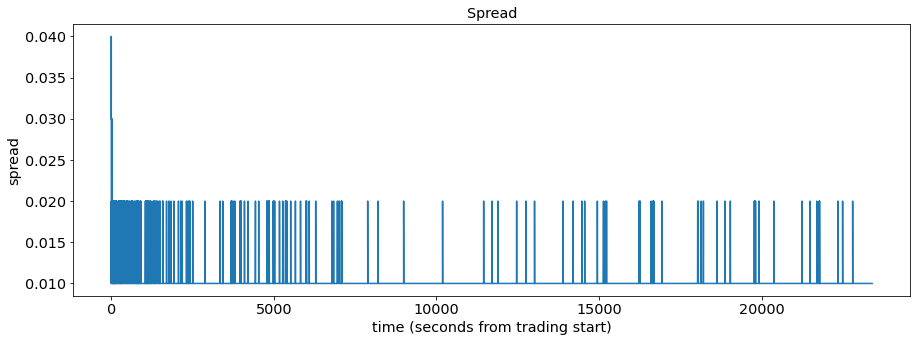

In [25]:
plt.plot(t,spread)
plt.title('Spread')
plt.ylabel('spread')
plt.xlabel('time (seconds from trading start)')
plt.show()

In [26]:
data = pd.DataFrame(spread)

In [27]:
data.describe()

,0
count,234000.000000
mean,0.010143
std,0.001192
min,0.010000
25%,0.010000
50%,0.010000
75%,0.010000
max,0.040000


In [28]:
rho = np.array((bidvol[:,0]-askvol[:,0])/(bidvol[:,0]+askvol[:,0]),ndmin=2).T

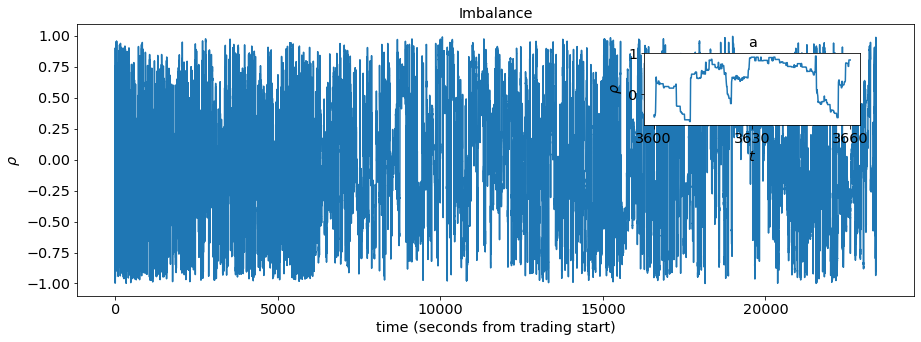

In [29]:
plt.plot(t, rho)
plt.title('Imbalance')
plt.ylabel(r'$\rho$')
plt.xlabel('time (seconds from trading start)')

a = plt.axes([.65, .6, .2, .2])
idx = (t>3600) & (t<=3600+60)
plt.plot( t[idx], rho[idx])
plt.title('a')
plt.ylabel(r'$\rho$')
plt.xlabel(r'$t$')
plt.xticks([3600,3630,3660])

plt.show()

# Fig 4

In [30]:
data = pd.DataFrame(rho)

In [31]:
data.describe()

,0
count,234000.000000
mean,0.005051
std,0.472877
min,-0.999576
25%,-0.360743
50%,0.008875
75%,0.386873
max,0.995187


# Liquidation with Permanent Price Impact

In [2]:
import numpy as np
import import_ipynb
import Liquidation_Permanent_Price_Impact_helper as lppi_helpers

importing Jupyter notebook from Liquidation_Permanent_Price_Impact_helper.ipynb


In [3]:
# Parameter settings
T = 1
Ndt = 6.5 * 3600 # 6500hrs * 3600
dt = T / Ndt
t = np.arange(0, T + dt, dt) 

k = 0.002 # set own k e.g (0.002 or 0.005) k is temporal price impact
b = 0.003 # 0.004 or 0.002 b is permanent price impart

tau = T - t
tt = np.arange(0, 1 + 1 / 10, 1 / 10)

myphi = np.array([0.001, 0.01, 0.1])
symb = np.array(["o", "*", "+", "^"])

alpha = 100

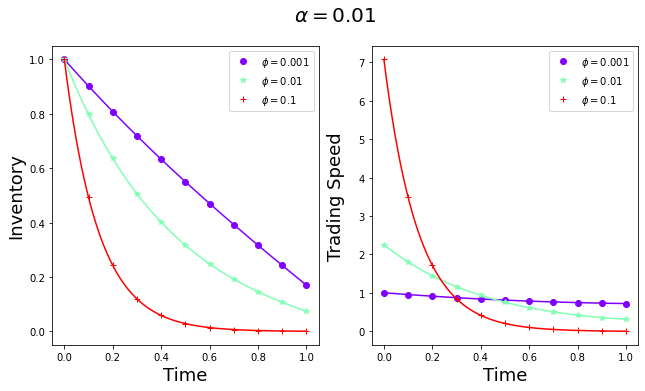

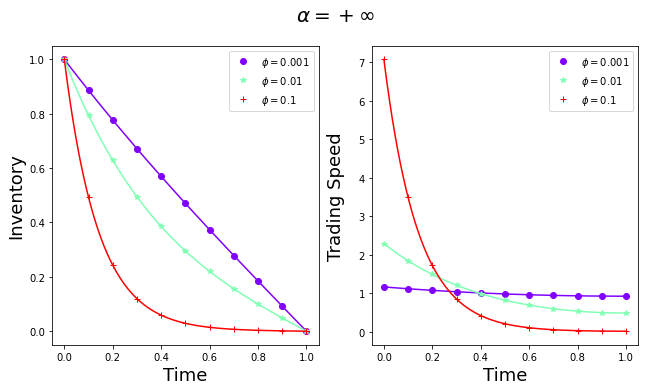

In [4]:
# Fig 5
lppi_helpers.plot_inventory_trading_speed(0.01, myphi, symb, t, tt, T, b, k, [r"$\phi = $" + str(i) for i in myphi], main=r"$\alpha = 0.01$")
lppi_helpers.plot_inventory_trading_speed(1000000, myphi, symb, t, tt, T, b, k, [r"$\phi = $" + str(i) for i in myphi], main=r"$\alpha = +\infty$")

# Non-Linear Temporary Price Impact

In [6]:
# Parameter Settings
a = np.array([1, 0.8, 0.6])
k = 0.0002
b = 0.0003

phi = 10 * k
alpha = 100 * k
T = 1
qmax = 1

Ndt = 10000
Ndq = 100

dt = T / Ndt
dq = qmax / Ndq

In [7]:
nus, Qs, myleg, t, q = lppi_helpers.solve_pde(T, dt, qmax, dq, k, a, b, alpha, phi, Ndt, Ndq)

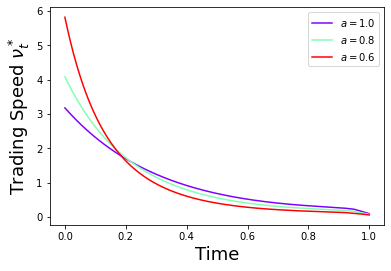

In [8]:
lppi_helpers.plot_multiple(t, nus.T, r"Time", r"Trading Speed $\nu^*_t$", None, myleg)

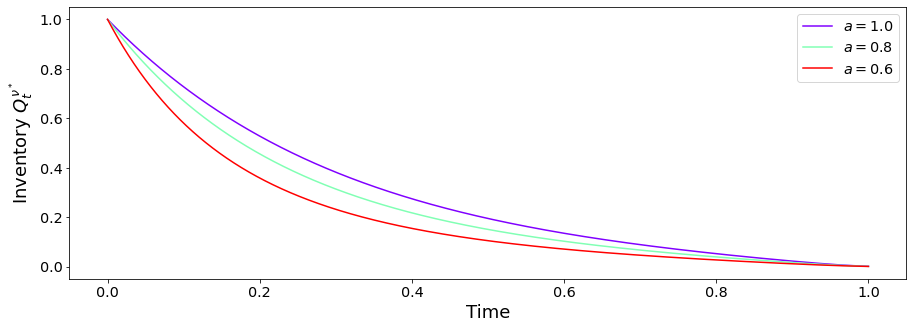

In [63]:
lppi_helpers.plot_multiple(t, Qs.T, r"Time", r"Inventory $Q_t^{\nu^*}$", None, myleg)